## 43단계: 신경망

> .

### 43.1 DeZero의 linear 함수

<img src="images/그림 43-1.png" width=500/>

In [1]:
# dezero/functions.py

from dezero.functions import matmul

def linear_simple(x, W, b):
    t = matmul(x, W)
    if b is None:
        return t
    
    y = t + b
    t.data = None  # t의 데이터 삭제
    return y

### 43.2 비선형 데이터셋

<img src="images/그림 43-2.png" width=500/>

In [2]:
import numpy as np

np.random.seed(0)
x = np.random.randn(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

### 43.3 활성화 함수와 신경망

<img src="images/그림 43-3.png" width=500/>

In [3]:
# dezero/functions.py
from dezero.core import as_variable

def sigmoid_simple(x):
    x = as_variable(x)
    y = 1 / (1 + np.exp(-x))
    return y


Variable(0.8473695850105871)
Variable(0.2514286285183607)
Variable(0.24759485466749878)
Variable(0.23786120447054832)
Variable(0.21222231333102953)
Variable(0.16742181117834223)
Variable(0.0968193261999272)
Variable(0.07849528290602335)
Variable(0.07749729552991157)
Variable(0.07722132399559317)


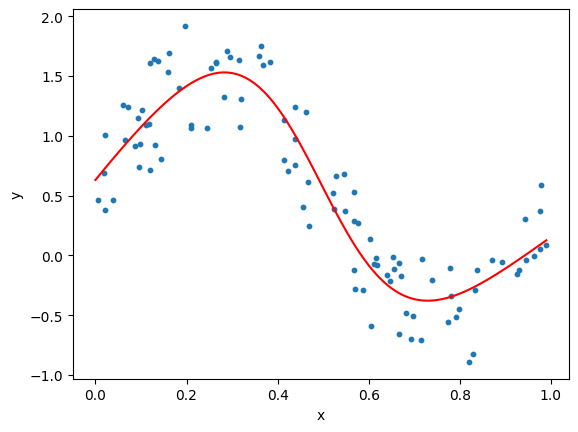

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))


def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y


lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)


# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()